In [577]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [578]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [579]:
LeadScore_df = pd.read_csv("Lead-analysis/LeadGen.csv", encoding='utf-8-sig',parse_dates=['Web_Date','SubYearMonth'])
LeadScore_df

,AnnualRevenue,Lead_Capture_Date,LEAD_ID,Lead_Score,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Is_Funded,Is_Submitted,SubYearMonth
0,NaN,4/13/2021,00Q6g000009KjKzEAK,3,0064u0000137kcFAAQ,NaN,NaN,5192.0,Direct,NaN,NaT,NaN,NaN,NaN,0,1,2020-08-01
1,125000.0,3/31/2021,00Q4u00001e3m3GEAQ,21,0064u000013rQR3AAM,30000.0,4.0,1101.0,Lending Tree,NaN,2021-03-31,NaN,$100k-$200k,NaN,1,1,2020-12-01
2,0.0,4/28/2021,00Q4u00001e2m7kEAA,18,0064u000013rghBAAQ,NaN,4.0,5061.0,Direct,"$25,000 to $50,000",2021-04-28,NaN,$100k-$200k,6 Months to 1 Year,0,1,2021-04-01
3,525000.0,1/4/2021,00Q4u00001d7TSaEAM,8,0064u000013sNViAAM,250000.0,NaN,1257.0,Strategic Partners,NaN,NaT,NaN,$500k-$1mm,NaN,0,1,2021-01-01
4,25598.0,1/2/2021,00Q4u00001cYD9pEAG,14,0064u000013sNY2AAM,NaN,3.0,5192.0,Direct,"$25,000 to $50,000",2021-01-02,NaN,$500k-$1mm,Greater than 3 Years,0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74998,NaN,8/31/2021,00Q4u00001gRDQmEAO,3,0064u000017TjiGAAS,0.0,NaN,5061.0,Direct,NaN,NaT,NaN,NaN,NaN,0,0,NaT
74999,NaN,8/30/2021,00Q4u00001gR9qsEAC,11,0064u000017TjiVAAS,NaN,2.0,5061.0,Direct,"$10,000 to $25,000",2021-08-30,NaN,"Less than $100,000",1 to 3 Years,0,0,NaT
75000,NaN,8/31/2021,00Q4u00001gRjs8EAC,3,0064u000017TjjJAAS,0.0,NaN,5061.0,Direct,NaN,NaT,NaN,NaN,NaN,0,0,NaT
75001,NaN,8/30/2021,00Q4u00001gxUKHEA2,24,0064u000017TjjdAAC,NaN,4.0,1119.0,Digital - Affiliate,"$10,000 to $25,000",2021-08-30,NaN,$100k-$200k,Greater than 3 Years,0,0,NaT


In [580]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75003 entries, 0 to 75002
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   AnnualRevenue           52372 non-null  float64       
 1   Lead_Capture_Date       75003 non-null  object        
 2   LEAD_ID                 75003 non-null  object        
 3   Lead_Score              75003 non-null  int64         
 4   OPPORTUNITY_ID          75003 non-null  object        
 5   Requested_Amount        36190 non-null  float64       
 6   Self_Graded_Credit      65817 non-null  float64       
 7   Web_Ad_Outlet           73932 non-null  float64       
 8   Web_Ad_Outlet_Source    74583 non-null  object        
 9   Web_Amount_to_Borrow    33273 non-null  object        
 10  Web_Date                52155 non-null  datetime64[ns]
 11  Web_Form_Name           0 non-null      float64       
 12  Web_Gross_Annual_Sales  60384 non-null  object

In [581]:
LeadScore_df.isnull().sum()

AnnualRevenue             22631
Lead_Capture_Date             0
LEAD_ID                       0
Lead_Score                    0
OPPORTUNITY_ID                0
Requested_Amount          38813
Self_Graded_Credit         9186
Web_Ad_Outlet              1071
Web_Ad_Outlet_Source        420
Web_Amount_to_Borrow      41730
Web_Date                  22848
Web_Form_Name             75003
Web_Gross_Annual_Sales    14619
Web_Time_in_Business      41514
Is_Funded                     0
Is_Submitted                  0
SubYearMonth              63069
dtype: int64

In [582]:
LeadScore_df.columns

Index(['AnnualRevenue', 'Lead_Capture_Date', 'LEAD_ID', 'Lead_Score',
       'OPPORTUNITY_ID', 'Requested_Amount', 'Self_Graded_Credit',
       'Web_Ad_Outlet', 'Web_Ad_Outlet_Source', 'Web_Amount_to_Borrow',
       'Web_Date', 'Web_Form_Name', 'Web_Gross_Annual_Sales',
       'Web_Time_in_Business', 'Is_Funded', 'Is_Submitted', 'SubYearMonth'],
      dtype='object')

In [583]:
LeadScore_df.groupby('Web_Ad_Outlet').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet
1000.0    562
1001.0    138
1002.0     12
1003.0      7
1005.0      0
         ... 
5077.0      3
5081.0    756
5190.0    230
5191.0      6
5192.0    333
Name: Is_Submitted, Length: 64, dtype: int64

In [584]:
LeadScore_df.groupby('Web_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

Web_Amount_to_Borrow
$10,000 to $25,000      789
$100,000 or More        210
$25,000 to $50,000     1161
$5,000 to $10,000       334
$50,000 to $100,000     413
10,000.00                 1
100,000 or More           4
150,000.00               85
25,000.00               276
250,000.00               27
5,000.00                 62
50,000.00                 1
75,000.00               247
Name: Is_Submitted, dtype: int64

In [585]:
LeadScore_df.groupby('Web_Gross_Annual_Sales').sum()['Is_Submitted'].round(decimals=2)

Web_Gross_Annual_Sales
$100k-$200k           2752
$1mm+                 1056
$200k-$500k           2685
$500k-$1mm            1026
Less than $100,000    1801
Name: Is_Submitted, dtype: int64

In [586]:
LeadScore_df.groupby('Web_Time_in_Business').sum()['Is_Submitted'].round(decimals=2)

Web_Time_in_Business
0-6 Months                 2
1 to 3 Years            1828
1-3 years                  0
3 years or more            0
6 Months to 1 Year       544
6-12 Months                0
Greater than 3 Years    1166
Less than 6 Months       110
Name: Is_Submitted, dtype: int64

In [587]:
LeadScore_df['Web_Amount_to_Borrow'] = LeadScore_df['Web_Amount_to_Borrow'].str.replace(',','')

In [588]:
LeadScore_df['Requested_Amount'].fillna(LeadScore_df['Web_Amount_to_Borrow'], inplace = True)

LeadScore_df['AnnualRevenue'].fillna(LeadScore_df['Web_Gross_Annual_Sales'], inplace = True)

In [589]:
LeadScore_df['Requested_Amount'] = LeadScore_df['Requested_Amount'].str.replace(',','')

In [590]:
LeadScore_df = LeadScore_df.drop(['Web_Form_Name', 'Web_Amount_to_Borrow','Web_Gross_Annual_Sales','Web_Date','SubYearMonth','OPPORTUNITY_ID','LEAD_ID','Lead_Capture_Date' ], axis=1)
LeadScore_df.head()

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
0,NaN,3,NaN,NaN,5192.0,Direct,NaN,0,1
1,125000.0,21,NaN,4.0,1101.0,Lending Tree,NaN,1,1
2,0.0,18,$25000 to $50000,4.0,5061.0,Direct,6 Months to 1 Year,0,1
3,525000.0,8,NaN,NaN,1257.0,Strategic Partners,NaN,0,1
4,25598.0,14,$25000 to $50000,3.0,5192.0,Direct,Greater than 3 Years,0,0


In [591]:
LeadScore_df.groupby('Web_Ad_Outlet_Source').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet_Source
Digital - Affiliate     129
Digital-Organic         751
Digital-PPC             453
Direct                 3340
Lending Tree           3206
Strategic Partners     3846
Name: Is_Submitted, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Lending Tree'),
  Text(2, 0, 'Strategic Partners'),
  Text(3, 0, 'Digital-PPC'),
  Text(4, 0, 'Digital-Organic'),
  Text(5, 0, 'Digital - Affiliate')])

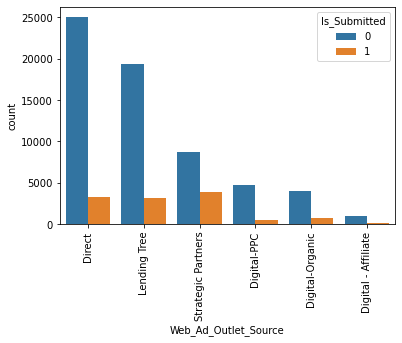

In [592]:
sns.countplot(x = "Web_Ad_Outlet_Source", hue = "Is_Submitted", data = LeadScore_df)
xticks(rotation = 90)

In [593]:
LeadScore_mask = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.Web_Ad_Outlet_Source == 'Direct')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(30)

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
25557,460001.0,8,$50000 to $100000,1.0,5192.0,Direct,Greater than 3 Years,0,1
62085,$100k-$200k,18,$10000 to $25000,4.0,5192.0,Direct,1 to 3 Years,0,1
17951,42778.0,3,NaN,NaN,5192.0,Direct,NaN,0,1
54063,NaN,3,NaN,NaN,5081.0,Direct,NaN,0,1
42074,69070.0,13,$100000 or More,3.0,5028.0,Direct,1 to 3 Years,0,1
41362,0.0,14,$25000 to $50000,3.0,5061.0,Direct,1 to 3 Years,0,1
48500,0.0,12,$25000 to $50000,2.0,5061.0,Direct,1 to 3 Years,0,1
34744,0.0,17,$25000 to $50000,4.0,5061.0,Direct,1 to 3 Years,0,1
60917,NaN,3,NaN,NaN,5190.0,Direct,NaN,0,1
35743,65548.0,17,$10000 to $25000,4.0,5190.0,Direct,Greater than 3 Years,0,1


In [594]:
LeadScore_df = LeadScore_df.dropna()
LeadScore_df

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
2,0.0,18,$25000 to $50000,4.0,5061.0,Direct,6 Months to 1 Year,0,1
4,25598.0,14,$25000 to $50000,3.0,5192.0,Direct,Greater than 3 Years,0,0
8,"Less than $100,000",14,$5000 to $10000,4.0,1226.0,Strategic Partners,Greater than 3 Years,0,1
9,$500k-$1mm,10,250000.00,1.0,1085.0,Digital-PPC,3 years or more,0,0
10,$100k-$200k,15,$5000 to $10000,4.0,1226.0,Strategic Partners,1 to 3 Years,0,0
...,...,...,...,...,...,...,...,...,...
74996,$1mm+,24,$10000 to $25000,3.0,1119.0,Digital - Affiliate,Greater than 3 Years,0,0
74997,"Less than $100,000",14,$25000 to $50000,3.0,1000.0,Digital-Organic,1 to 3 Years,0,0
74999,"Less than $100,000",11,$10000 to $25000,2.0,5061.0,Direct,1 to 3 Years,0,0
75001,$100k-$200k,24,$10000 to $25000,4.0,1119.0,Digital - Affiliate,Greater than 3 Years,0,0


In [595]:
LeadScore_df.groupby('Is_Submitted').mean()['Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    3.13
1    3.09
Name: Self_Graded_Credit, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Strategic Partners'),
  Text(2, 0, 'Digital-PPC'),
  Text(3, 0, 'Digital-Organic'),
  Text(4, 0, 'Lending Tree'),
  Text(5, 0, 'Digital - Affiliate')])

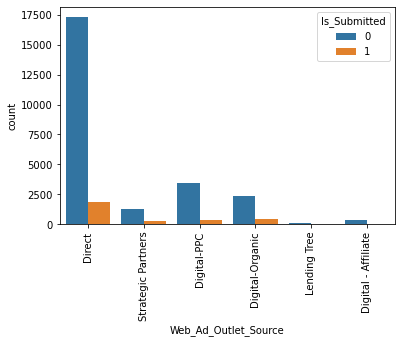

In [596]:
sns.countplot(x = "Web_Ad_Outlet_Source", hue = "Is_Submitted", data = LeadScore_df)
xticks(rotation = 90)

In [597]:
#ax = LeadScore_df['AnnualRevenue'].plot.hist(bins=25)

In [598]:
LeadScore_df.groupby('Is_Submitted').mean()['Lead_Score'].round(decimals=2)

Is_Submitted
0    14.32
1    14.70
Name: Lead_Score, dtype: float64

In [599]:
#Outlet ource Label
#1000= General-Organic , #1001= Google-Organic, #1002= Bing-Organic, #1003= Yahoo-Organic, #1004= LinkedIn-Organic,
#1010=Google-Non-Branded, #1011=Google-Branded, #1070= Facebook-Facebook, #1085= RateKick-Ratekick, #1101=LendingTree, 
#1118= TrafficPoint-General, #1119=BusinessLoans.com, #1241=Fleetcor, #1257=Fundera, #1280= Fundera, #1240=Fleetcor, 
#5000=DirectMail, #5018=DirectMail, #5021=D&B-ALC, #5037=DirectMail, #1226=Fundera, #5028=Epsilon, #5051=Direct Mail, 
#5081=Accutrend- ALC, #5190=DirectMail-Merit, #5053=DirectMail-Small Bussinesss, #5055=DirectMail-Epsilon on BalanceSheet,
#5061=Marketforce-ALC, #5071=Crosslists-ALC& New Bus, #5192=DirectMail-Merit 

In [600]:
from sklearn.preprocessing import LabelEncoder

Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

LeadScore_df['Requested_Amount'].replace(Amount_dict, inplace=True)

#Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

#LeadScore_df['Web_Amount_to_Borrow'].replace(Borrow_dict, inplace=True)

#Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
#LeadScore_df['Web_Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

LeadScore_df['AnnualRevenue'].replace(Revenue_dict, inplace=True)

Source_dict = {1000:0, 1001:1, 1002:2, 1003:3, 1004:4, 1010:5, 1011:6, 1070:7, 1085:8, 1101:9, 1118:10,
              1119:11, 1241:12, 1243: 13, 1257:14, 1280:15, 1240:16, 5000:17, 5018:18, 5020:19, 5021:20, 5037:21, 1226:22,
              5028:23, 5051:24, 5081:25, 5190:26, 5053:27, 5055:28,5061:29, 5071:30, 5191:31, 5192:32}

LeadScore_df['Web_Ad_Outlet'].replace(Source_dict, inplace=True)

Business_dict = {'0-6 Months':0,'1 to 3 Years':1, '1-3 years':2, '3 years or more':3, '6 Months to 1 Year':4, 'Greater than 3 Years':5,'6-12 Months':6, 'Less than 6 Months':7}
LeadScore_df['Web_Time_in_Business'].replace(Business_dict, inplace=True)

LeadScore_df.sample(10)

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
6025,0.0,7,75000.0,1.0,29.0,Direct,4,0,0
27325,350000.0,15,75000.00,3.0,5.0,Digital-PPC,1,0,0
74670,35000.0,11,7500.0,3.0,0.0,Digital-Organic,7,0,0
47241,35000.0,7,75000.00,1.0,6.0,Digital-PPC,1,0,0
48796,0.0,11,7500.0,3.0,29.0,Direct,4,0,0
2720,0.0,12,75000.0,2.0,23.0,Direct,5,0,0
3436,35000.0,17,5000.00,4.0,0.0,Digital-Organic,5,0,0
15374,35000.0,16,75000.00,4.0,1.0,Digital-Organic,1,0,0
39154,35000.0,14,25000.00,3.0,0.0,Digital-Organic,5,1,1
48741,0.0,14,7500.0,4.0,29.0,Direct,1,0,0


In [601]:
LeadScore_mask = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.Web_Ad_Outlet_Source == 'Direct')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(20)

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
45269,0.0,18,75000.0,4.0,29.0,Direct,1,1,1
73440,35000.0,14,37500.0,3.0,29.0,Direct,5,1,1
10398,0.0,18,37500.0,4.0,25.0,Direct,1,1,1
38430,150000.0,9,37500.0,1.0,17.0,Direct,1,0,1
23320,0.0,17,37500.0,4.0,29.0,Direct,1,0,1
58156,35000.0,17,17500.0,4.0,25.0,Direct,1,0,1
39331,0.0,13,37500.0,2.0,29.0,Direct,1,0,1
28505,35000.0,14,17500.0,3.0,17.0,Direct,1,0,1
61786,150000.0,8,100000.0,1.0,29.0,Direct,4,1,1
28742,0.0,18,37500.0,4.0,23.0,Direct,5,0,1


In [602]:
LeadScore_mask = (LeadScore_df.Is_Submitted == 1) & (LeadScore_df.Web_Ad_Outlet_Source == 'Digital-Organic')

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered.sample(20)

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
37116,350000.0,19,37500.0,4.0,0.0,Digital-Organic,4,1,1
72788,35000.0,17,37500.0,4.0,0.0,Digital-Organic,5,0,1
33037,35000.0,14,7500.0,4.0,0.0,Digital-Organic,7,0,1
26040,350000.0,16,37500.0,3.0,1.0,Digital-Organic,5,0,1
13005,350000.0,15,75000.00,3.0,0.0,Digital-Organic,7,0,1
6165,350000.0,19,25000.00,4.0,0.0,Digital-Organic,1,0,1
11680,35000.0,16,75000.00,4.0,1.0,Digital-Organic,4,0,1
45021,35000.0,17,17500.0,4.0,1.0,Digital-Organic,1,0,1
484,35000.0,17,25000.00,4.0,0.0,Digital-Organic,5,0,1
35545,150000.0,18,17500.0,4.0,0.0,Digital-Organic,1,0,1


In [603]:
LeadScore_df.dtypes

AnnualRevenue           float64
Lead_Score                int64
Requested_Amount         object
Self_Graded_Credit      float64
Web_Ad_Outlet           float64
Web_Ad_Outlet_Source     object
Web_Time_in_Business      int64
Is_Funded                 int64
Is_Submitted              int64
dtype: object

In [604]:
LeadScore_df["Requested_Amount"]= pd.to_numeric(LeadScore_df["Requested_Amount"], downcast="float")
#LeadScore_df["Web_Amount_to_Borrow"]= pd.to_numeric(LeadScore_df["Web_Amount_to_Borrow"], downcast="float")
LeadScore_df["AnnualRevenue"]= pd.to_numeric(LeadScore_df["AnnualRevenue"], downcast="float")
#LeadScore_df["Web_Gross_Annual_Sales"]= pd.to_numeric(LeadScore_df["Web_Gross_Annual_Sales"], downcast="float")
LeadScore_df["Web_Time_in_Business"]= pd.to_numeric(LeadScore_df["Web_Time_in_Business"], downcast="float")

LeadScore_df.head()                                                 

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
2,0.0,18,37500.0,4.0,29.0,Direct,4.0,0,1
4,25598.0,14,37500.0,3.0,32.0,Direct,5.0,0,0
8,35000.0,14,7500.0,4.0,22.0,Strategic Partners,5.0,0,1
9,750000.0,10,250000.0,1.0,8.0,Digital-PPC,3.0,0,0
10,150000.0,15,7500.0,4.0,22.0,Strategic Partners,1.0,0,0


In [605]:
LeadScore_df.groupby('Is_Submitted').mean()['Requested_Amount'].round(decimals=2)

Is_Submitted
0    39285.468750
1    43499.320312
Name: Requested_Amount, dtype: float32

In [606]:
LeadScore_df.groupby('Is_Submitted').mean()['AnnualRevenue'].round(decimals=2)

Is_Submitted
0    186639.484375
1    128561.656250
Name: AnnualRevenue, dtype: float32

In [607]:
LeadScore_df.groupby('Web_Ad_Outlet').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet
0.0       335
1.0        84
2.0         3
3.0         1
5.0        46
6.0       224
7.0        15
8.0        39
9.0        21
10.0        3
11.0       36
12.0       30
13.0        0
16.0      127
17.0      181
18.0       16
19.0        0
20.0        0
21.0        5
22.0       98
23.0       70
24.0       36
25.0      373
26.0      134
27.0        5
28.0        5
29.0      816
30.0       37
31.0        2
32.0      188
1005.0      0
1105.0      0
1203.0      1
1211.0      1
1212.0      1
1213.0      0
1220.0      1
1221.0      0
1238.0      0
1242.0     10
1262.0      0
5039.0      1
5040.0      0
5043.0      0
5045.0      0
5047.0      0
5049.0      0
5057.0      0
5077.0      2
Name: Is_Submitted, dtype: int64

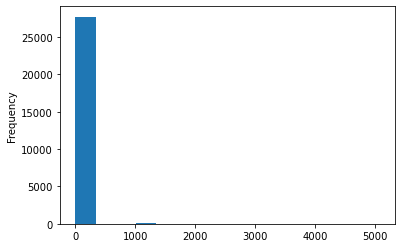

In [608]:
ax = LeadScore_df['Web_Ad_Outlet'].plot.hist(bins=15)

In [521]:
#ax = LeadScore_df['Web_Gross_Annual_Sales'].plot.hist(bins=15)

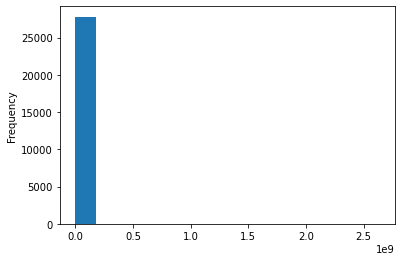

In [609]:
ax = LeadScore_df['AnnualRevenue'].plot.hist(bins=15)

In [ ]:
#fig, axs = plt.subplots(figsize = (12,6))
#sns.countplot(x = 'Ad_Outlet_Source', hue= "Is_Submitted", LeadScore_df = LeadScore_df)
#xticks(rotation = 90)

In [610]:
Outlet_dict = {"Digital - Affiliate":0, "Digital-Organic":1, "Direct":2 ,"Digital-PPC":3, "Lending Tree":4, 'Strategic Partners':5}
             
LeadScore_df['Web_Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [611]:
LeadScore_df["Web_Ad_Outlet_Source"]= pd.to_numeric(LeadScore_df["Web_Ad_Outlet_Source"], downcast="float")

In [ ]:
#pd.options.display.float_format = '{:,.2f}'.format

array([<AxesSubplot:title={'center':'Lead_Score'}, xlabel='Is_Submitted'>,
       <AxesSubplot:title={'center':'Requested_Amount'}, xlabel='Is_Submitted'>],
      dtype=object)

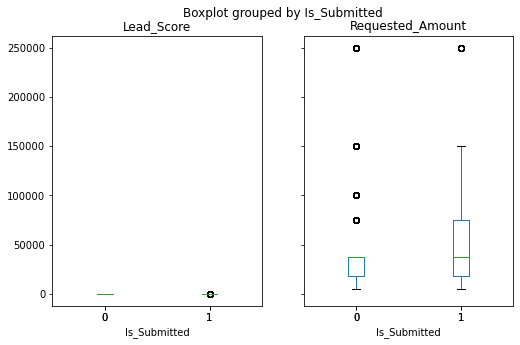

In [612]:
LeadScore_df.boxplot(by ='Is_Submitted', column=['Lead_Score','Requested_Amount'], grid=False, figsize=(8,5))

In [527]:
LeadScore_df.describe()

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
count,2.781300e+04,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,1.804823e+05,14.361090,39730.210938,3.127710,28.627656,2.189516,2.906231,0.012728,0.105958
std,1.582848e+07,3.094911,37383.500000,0.940453,164.577017,0.884221,2.031077,0.112100,0.307789
min,0.000000e+00,5.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,12.000000,17500.000000,3.000000,11.000000,2.000000,1.000000,0.000000,0.000000
50%,3.500000e+04,14.000000,37500.000000,3.000000,25.000000,2.000000,1.000000,0.000000,0.000000
75%,3.500000e+04,17.000000,37500.000000,4.000000,29.000000,2.000000,5.000000,0.000000,0.000000
max,2.639720e+09,24.000000,250000.000000,4.000000,5077.000000,5.000000,7.000000,1.000000,1.000000


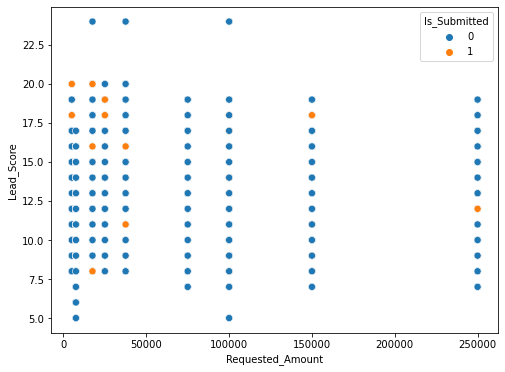

In [528]:
#%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot("Requested_Amount","Lead_Score", hue="Is_Submitted", data=LeadScore_df, s=50)
plt.show()

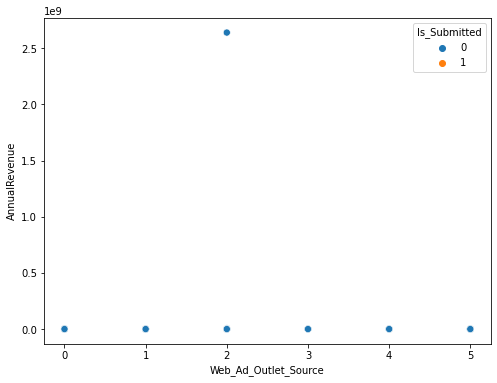

In [529]:
plt.figure(figsize=(8,6))
sns.scatterplot("Web_Ad_Outlet_Source","AnnualRevenue", hue="Is_Submitted", data=LeadScore_df, s=50)
plt.show()

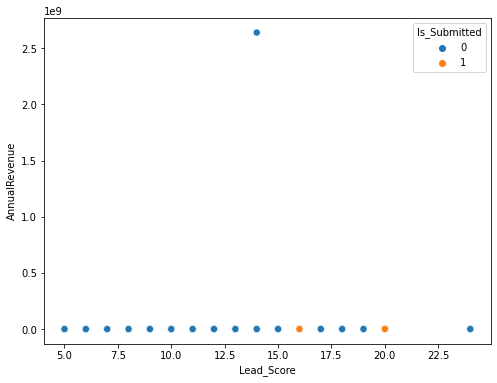

In [530]:
plt.figure(figsize=(8,6))
sns.scatterplot("Lead_Score","AnnualRevenue", hue="Is_Submitted", data=LeadScore_df, s=50)
plt.show()

In [613]:
Submitted = (sum(LeadScore_df["Is_Submitted"])/len(LeadScore_df['Is_Submitted'].index))*100
Submitted

10.595764570524576

In [614]:
Lead_cluster_data = LeadScore_df.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded
Is_Submitted,,,,,,,,
0,186639.484375,14.320357,39285.468750,3.132108,28.417719,2.184951,2.912813,0.000201
1,128561.664062,14.704785,43499.320312,3.090601,30.399050,2.228029,2.850696,0.118426


In [615]:
LeadScore_df.corr()

,AnnualRevenue,Lead_Score,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Time_in_Business,Is_Funded,Is_Submitted
AnnualRevenue,1.000000,0.000853,0.002901,-0.008950,0.183149,-0.000949,0.007618,-0.000022,-0.001129
Lead_Score,0.000853,1.000000,-0.099313,0.807440,-0.015376,-0.099466,-0.013866,0.014527,0.038231
Requested_Amount,0.002901,-0.099313,1.000000,-0.241322,-0.010278,0.057087,0.104650,0.027046,0.034693
Self_Graded_Credit,-0.008950,0.807440,-0.241322,1.000000,-0.022284,0.004143,-0.055637,-0.021217,-0.013584
Web_Ad_Outlet,0.183149,-0.015376,-0.010278,-0.022284,1.000000,0.054235,0.018116,0.025172,0.003705
Web_Ad_Outlet_Source,-0.000949,-0.099466,0.057087,0.004143,0.054235,1.000000,0.081833,0.004320,0.014993
Web_Time_in_Business,0.007618,-0.013866,0.104650,-0.055637,0.018116,0.081833,1.000000,-0.008812,-0.009412
Is_Funded,-0.000022,0.014527,0.027046,-0.021217,0.025172,0.004320,-0.008812,1.000000,0.324606
Is_Submitted,-0.001129,0.038231,0.034693,-0.013584,0.003705,0.014993,-0.009412,0.324606,1.000000


In [616]:
X = LeadScore_df[['Requested_Amount','AnnualRevenue',
                  'Web_Ad_Outlet_Source','Lead_Score','Self_Graded_Credit','Web_Ad_Outlet','Web_Time_in_Business']]

y = LeadScore_df[['Is_Submitted']]

In [617]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [618]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [619]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                19469
Model:                            GLM   Df Residuals:                    19461
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6494.7
Date:                Wed, 08 Sep 2021   Deviance:                       12989.
Time:                        15:25:45   Pearson chi2:                 1.93e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6936      0.107    -25.129      0.000      -2.904      -2.484
x1             0.2210      0.156      1.413      0.158      -0.086       0.528
x2             3.2464      0.690      4.703      0.000       1.894       4.599
x3             0.4091      0.129      3.183      0.001       0.157       0.661
x4             2.0772      0.243      8.532      0.000       1.600       2.554
x5            -0.9462      0.131     -7.215      0.000      -1.203      -0.689
x6             0.6313      0.608      1.039      0.299      -0.560       1.822
x7            -0.1964      0.082     -2.381      0.017      -0.358      -0.035
==============================================================================
"""

In [620]:
X_train.shape, y_train.shape

((19469, 7), (19469, 1))

In [621]:
X_test.shape, y_test.shape

((8344, 7), (8344, 1))

In [622]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.001627
Feature 1: 0.003886
Feature 2: 0.003716
Feature 3: 0.007789
Feature 4: 0.002559
Feature 5: 0.005554
Feature 6: 0.000000


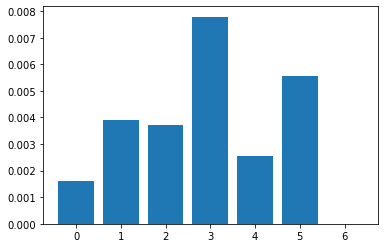

In [623]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [624]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [625]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 7)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [626]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [627]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [628]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Requested_Amount', True, 1),
 ('AnnualRevenue', True, 1),
 ('Web_Ad_Outlet_Source', True, 1),
 ('Lead_Score', True, 1),
 ('Self_Graded_Credit', True, 1),
 ('Web_Ad_Outlet', True, 1),
 ('Web_Time_in_Business', True, 1)]

In [629]:
col = X_train.columns[rfe.support_]
col

Index(['Requested_Amount', 'AnnualRevenue', 'Web_Ad_Outlet_Source',
       'Lead_Score', 'Self_Graded_Credit', 'Web_Ad_Outlet',
       'Web_Time_in_Business'],
      dtype='object')

In [630]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                19469
Model:                            GLM   Df Residuals:                    19461
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6494.7
Date:                Wed, 08 Sep 2021   Deviance:                       12989.
Time:                        15:29:43   Pearson chi2:                 1.93e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6936      0.107    -25.129      0.000      -2.904      -2.484
x1             0.2210      0.156      1.413      0.158      -0.086       0.528
x2             3.2464      0.690      4.703      0.000       1.894       4.599
x3             0.4091      0.129      3.183      0.001       0.157       0.661
x4             2.0772      0.243      8.532      0.000       1.600       2.554
x5            -0.9462      0.131     -7.215      0.000      -1.203      -0.689
x6             0.6313      0.608      1.039      0.299      -0.560       1.822
x7            -0.1964      0.082     -2.381      0.017      -0.358      -0.035
==============================================================================
"""

In [631]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.09823329, 0.11888969, 0.10285465, 0.1596202 , 0.10179373,
       0.07602262, 0.11046363, 0.08727918, 0.07485115, 0.0934973 ])

In [632]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.09823329, 0.11888969, 0.10285465, 0.1596202 , 0.10179373,
       0.07602262, 0.11046363, 0.08727918, 0.07485115, 0.0934973 ])

In [633]:
# find the predicted-prob
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.098233,0,20116
0.118890,0,818
0.102855,0,61595
0.159620,0,23288
0.101794,0,48898
...,...,...
0.101794,0,31434
0.105151,0,45729
0.102444,0,23382
0.093886,0,25487


In [634]:
y_train_pred_final.reset_index(inplace=True)

In [635]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [638]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.155 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,predicted
0,0.098233,0,20116,0
1,0.118890,0,818,0
2,0.102855,0,61595,0
3,0.159620,0,23288,1
4,0.101794,0,48898,0


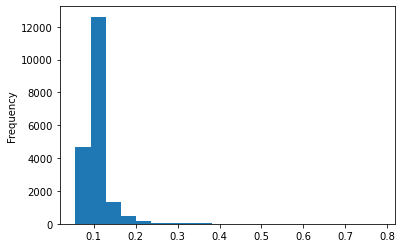

In [639]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=20)

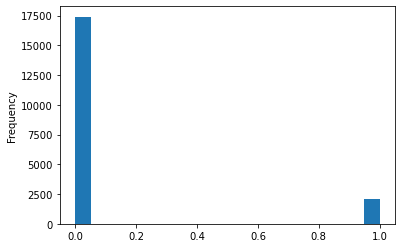

In [640]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

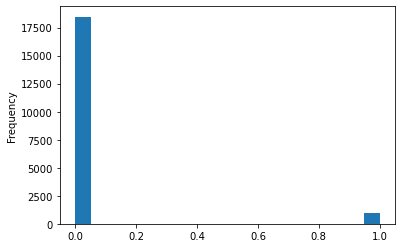

In [641]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [642]:
y_train_pred_final.to_csv('Sub_prob1.csv', index = True)

In [643]:
import imblearn

In [644]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [657]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [647]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.855


In [648]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [649]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.50025133 0.52598773 0.49969837 0.5        0.5       ]
Mean Accuracy Score for Log Reg: 0.5051874876519796



In [650]:
accuracy_score(y_test,y_pred, normalize=True) * 100

89.39357622243527

In [651]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8939853099799682


In [652]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [653]:
scores

{'fit_time': array([0.11201167, 0.081002  , 0.10705805, 0.07400632, 0.06300545]),
 'score_time': array([0.01300025, 0.01400137, 0.01200104, 0.01000047, 0.01100087]),
 'test_acc': array([0.50025133, 0.52598773, 0.49969837, 0.5       , 0.5       ]),
 'test_prec': array([0.50015119, 0.52239583, 0.49984871, 0.5       , 0.5       ]),
 'test_rec': array([0.99758745, 0.60506736, 0.99658154, 1.        , 1.        ]),
 'test_f1': array([0.66626385, 0.56070064, 0.66577109, 0.66666667, 0.66666667])}

In [654]:
KNN_model = KNeighborsClassifier()

In [655]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.68643812 0.70071378 0.68670822 0.6892218  0.68429519]
Mean Accuracy Score for KNN: 0.6894754242528636


In [661]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7071904560893023


In [664]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 6, 'splitter': 'best'}

In [665]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=6)

In [666]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 61.17322180219309
Out-of-sample Accuracy: 60.59679884179201


In [667]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[5176 1027]
 [3872 2358]]
              precision    recall  f1-score   support

           0       0.57      0.83      0.68      6203
           1       0.70      0.38      0.49      6230

    accuracy                           0.61     12433
   macro avg       0.63      0.61      0.58     12433
weighted avg       0.63      0.61      0.58     12433



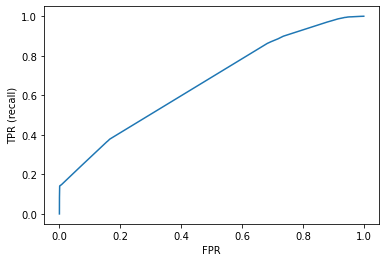

In [668]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [669]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [670]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.664


In [671]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.60745515 0.64583708 0.67173513 0.66237384 0.3532926 ]


In [672]:
feature_names = X = LeadScore_df[['Requested_Amount','AnnualRevenue',
                  'Web_Ad_Outlet_Source','Lead_Score','Self_Graded_Credit','Web_Ad_Outlet','Web_Time_in_Business']]

In [673]:
#print(feature_names)
model.feature_importances_

array([7.45348455e-02, 1.42982010e-01, 3.36644573e-02, 1.67216437e-04,
       2.26015664e-01, 2.87800282e-02, 4.93855779e-01])

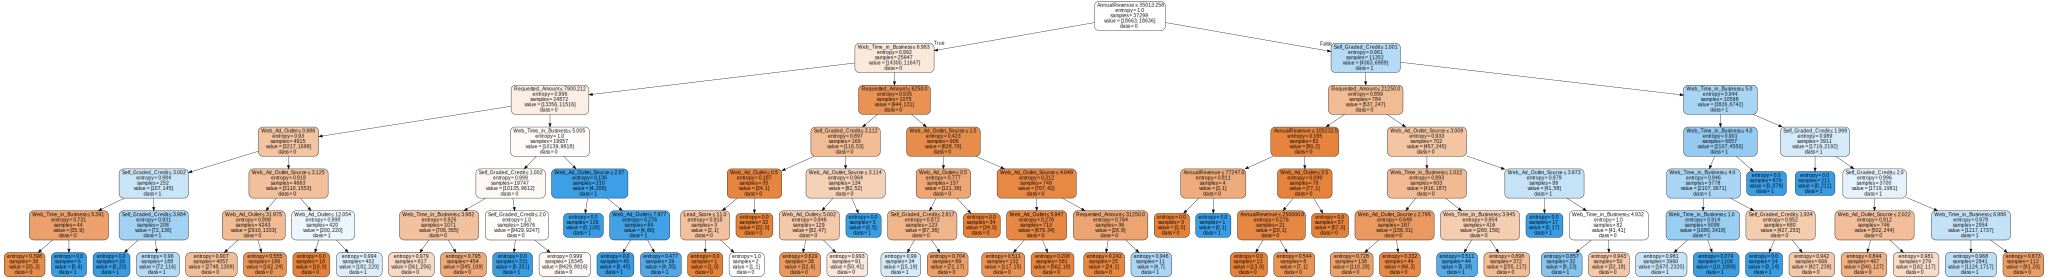

<Figure size 1440x1080 with 0 Axes>

In [674]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [675]:
graph.render("decision_treeLead1_graphviz")
'decision_treeLead1_graphviz.png'

'decision_treeLead1_graphviz.png'

In [676]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Web_Time_in_Business,0.493856
Self_Graded_Credit,0.226016
AnnualRevenue,0.142982
Requested_Amount,0.074535
Web_Ad_Outlet_Source,0.033664


In [677]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 81.52229282286389
Out-of-sample Accuracy: 77.43103032252876


In [678]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [679]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Random sample of 200 rows
#df.sample(n=200).head(10)


# Saving the randomly sampled rows:
df200 = df.sample(n=200)
df200.shape
# Output: (200, 5)

In [ ]:
#len(CreditRisk_merge['contract_number'].unique())